#Bu çalışmada ev fiyatlarını farklı regresyon algoritmaları ile tahmin ederek en az sapma metriclerini ve en yüksek r2 değerini veren algoritmayı kullancağız.
#Ev fiyatlarını tahmin etmek emlak sektöründe önemli katkılar sunar. Nerede nasıl pozisyon almaya olanak tanıyan doğru tahmin sistemi ile karlı sonuçlar elde etmeyi hedeflemekteyiz.

In [1]:
import pandas as pd 
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [3]:
df=pd.read_csv('kc_house_data.csv')

#Exploratory Data Analysis

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.shape

(21613, 21)

In [10]:
df.sample(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3508,3578700017,20150123T000000,695000.0,4,2.50,3010,11393,2.0,0,0,...,8,3010,0,2005,0,98028,47.7389,-122.221,2810,11282
21023,3448001411,20150220T000000,286000.0,2,1.50,1010,825,3.0,0,0,...,7,1010,0,2007,0,98125,47.7124,-122.301,1128,1080
15065,2112700920,20141014T000000,285000.0,3,1.75,1630,4000,1.0,0,0,...,7,1100,530,1968,0,98106,47.5351,-122.353,1300,4000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [14]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [18]:
df.corr(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


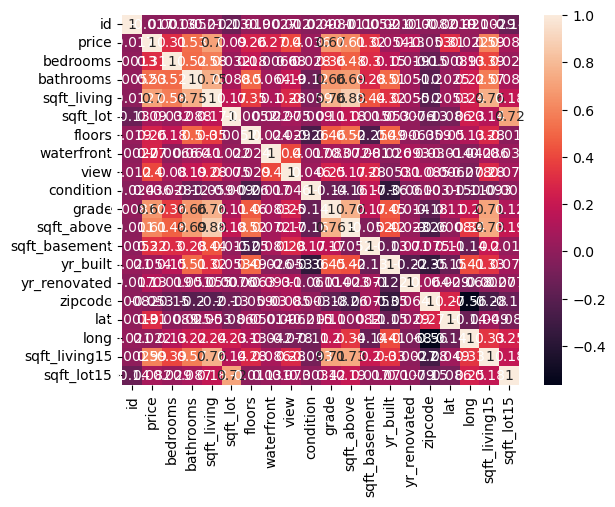

In [20]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

In [22]:
df['price'].mean(), df['price'].median(), df['price'].min(),df['price'].max(), df['price'].std()

(540088.1417665294, 450000.0, 75000.0, 7700000.0, 367127.1964826997)

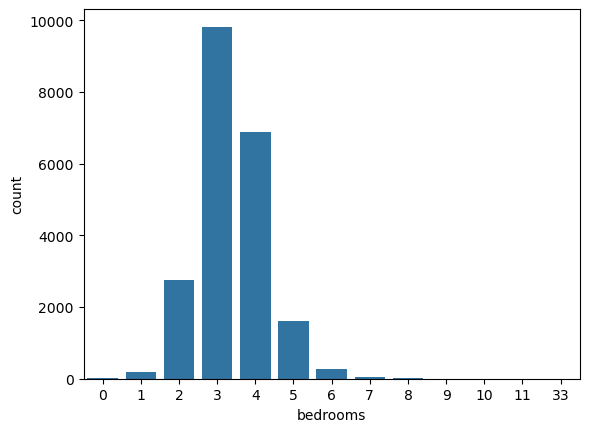

In [24]:
sns.countplot(x=df['bedrooms']);

In [256]:
sns.pairplot(df,hue='bedrooms')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002BC31AB6480> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

<Axes: xlabel='floors', ylabel='Density'>

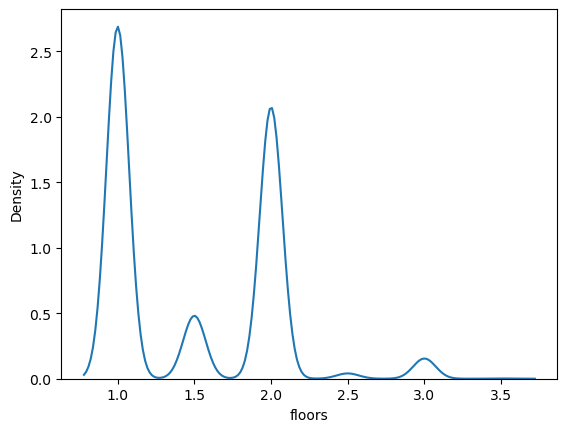

In [254]:
sns.kdeplot(x=df['floors'])

In [ ]:
sns.kdeplot(x=df['bathrooms'])

In [ ]:
sns.kdeplot(x=df[''])

In [294]:
abs(df.corr(numeric_only=True)['price'].sort_values(ascending=False)) #%90 altı ve %20 üstünü al

price            1.000000
sqft_living      0.702047
grade            0.667455
sqft_above       0.605595
sqft_living15    0.585388
bathrooms        0.525092
view             0.397209
sqft_basement    0.323642
bedrooms         0.316409
lat              0.306997
waterfront       0.266398
floors           0.256894
yr_renovated     0.126547
is_renovated     0.126205
sqft_lot         0.089683
sqft_lot15       0.082469
yr_built         0.053973
condition        0.036361
long             0.021590
id               0.016680
age              0.053973
Name: price, dtype: float64

In [260]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age', 'is_renovated'],
      dtype='object')

In [262]:
# Kategorik özellik oluşturma
bins = [-1, 0, 500, 1000, float('inf')]  # Aralıklar
labels = ['No Basement', '1-500', '501-1000', '1001+']  # Kategoriler
df['sqft_basement_category'] = pd.cut(df['sqft_basement'], bins=bins, labels=labels)

In [292]:
print(df[['sqft_basement', 'sqft_basement_category']].head(15))

    sqft_basement sqft_basement_category
0               0            No Basement
1             400                  1-500
2               0            No Basement
3             910               501-1000
4               0            No Basement
5            1530                  1001+
6               0            No Basement
7               0            No Basement
8             730               501-1000
9               0            No Basement
10           1700                  1001+
11            300                  1-500
12              0            No Basement
13              0            No Basement
14              0            No Basement


In [264]:
df['age']=2024-df['yr_built']

In [266]:
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [982]:
df=df[df['bedrooms']<8]

In [984]:
df=df[df['bathrooms']<5]

In [986]:
df=df[df['floors']<3]

In [988]:
df=df[df['sqft_lot15']<180000]

In [990]:
df['price'].max()

2485000.0

In [992]:
df=df[df['price']<2500000]

In [994]:
df['zipcode']=df['zipcode'].astype('category')

In [996]:
x=df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','view',
      'bedrooms','lat','waterfront','floors','age','zipcode','condition','sqft_lot','long','is_renovated','sqft_basement_category']]

In [998]:
x=pd.get_dummies(x, drop_first=True)  

In [1000]:
y=df[['price']]

In [1002]:
lr=LinearRegression()

In [1004]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [1006]:
model=lr.fit(x_train,y_train)

In [1008]:
tahmin=lr.predict(x_test)

In [1010]:
mean_squared_error(y_test,tahmin)**.5

121860.95005244242

In [1012]:
r2_score(y_test,tahmin)  #hedef r2_score> 0.80 and RMSE <100K

0.837787760710581

In [1014]:
R=Ridge()
L=Lasso()
E=ElasticNet()

In [1016]:
Rmodel=R.fit(x_train,y_train)

In [1018]:
tahmin2=Rmodel.predict(x_test)

In [1020]:
mean_squared_error(y_test,tahmin2)**0.5

121892.42457430181

In [1022]:
r2_score(y_test,tahmin2)

0.8377039568011905

In [1024]:
Lmodel=L.fit(x_train,y_train)

C:\Users\SABRI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.332e+14, tolerance: 1.562e+11
  model = cd_fast.enet_coordinate_descent(


In [1025]:
tahmin3=Lmodel.predict(x_test)

In [1026]:
mean_squared_error(y_test, tahmin3)**.5

121851.03944077106

In [1027]:
r2_score(y_test,tahmin3)

0.8378141441769748

In [1028]:
Emodel=E.fit(x_train,y_train)

In [1029]:
tahmin4=E.predict(x_test)

In [1030]:
mean_squared_error(y_test,tahmin4)**.5

184529.98755762144

In [1037]:
r2_score(y_test,tahmin4)

0.6280467093336953

In [1039]:
dt=DecisionTreeRegressor()

In [1042]:
Dmodel=dt.fit(x_train,y_train)

In [1043]:
tahmin5=dt.predict(x_test)

In [1046]:
mean_squared_error(y_test,tahmin5)**.5

142666.0971488818

In [1048]:
r2_score(y_test,tahmin5)

0.7776710271559093

In [1050]:
ET=ExtraTreesRegressor()

In [1052]:
ETmodel=ET.fit(x_train,y_train)

C:\Users\SABRI\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [1053]:
tahmin6=ET.predict(x_test)

In [1054]:
mean_squared_error(y_test,tahmin6)**.5

99886.43988310295

In [1055]:
r2_score(y_test,tahmin6)

0.8910147890339186

<Axes: xlabel='price', ylabel='Density'>

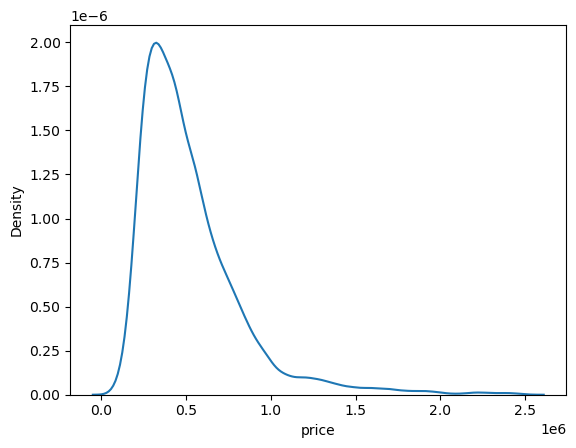

In [1056]:
sns.kdeplot(x=df['price'])

<Axes: xlabel='bedrooms', ylabel='Density'>

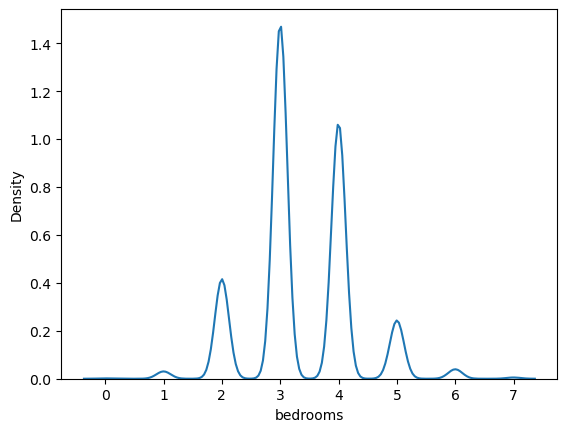

In [1057]:
sns.kdeplot(x=df['bedrooms'])

<Axes: xlabel='bathrooms', ylabel='Density'>

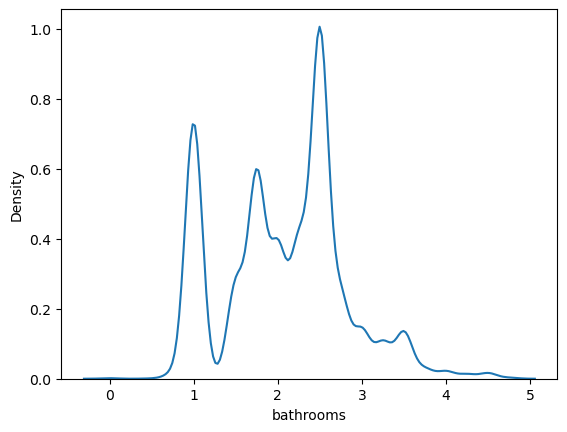

In [1058]:
sns.kdeplot(x=df['bathrooms'])

<Axes: xlabel='floors', ylabel='Density'>

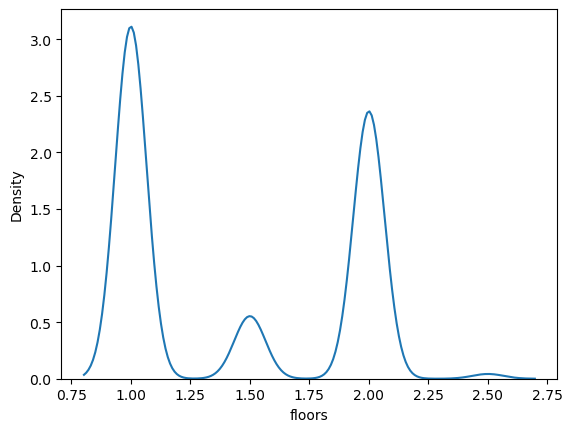

In [1059]:
sns.kdeplot(x=df['floors'])

<Axes: xlabel='sqft_lot15', ylabel='Density'>

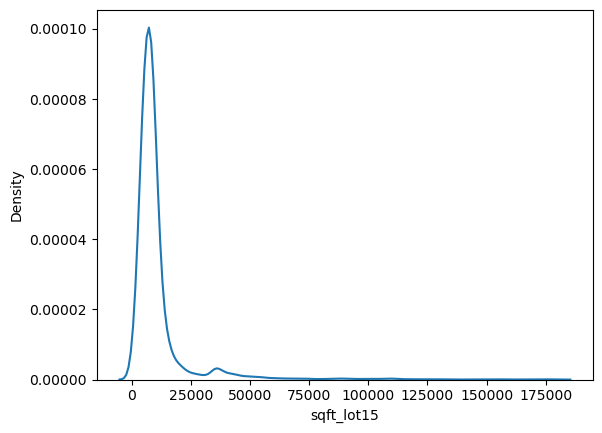

In [1060]:
sns.kdeplot(x=df['sqft_lot15'])